In [1]:
from datasets_dataloaders import create_gw_loaders

BATCH_SIZE = 4
NSAMPLES = 10


train_loader, test_loader = create_gw_loaders(nsamples=NSAMPLES, batch_size=BATCH_SIZE)


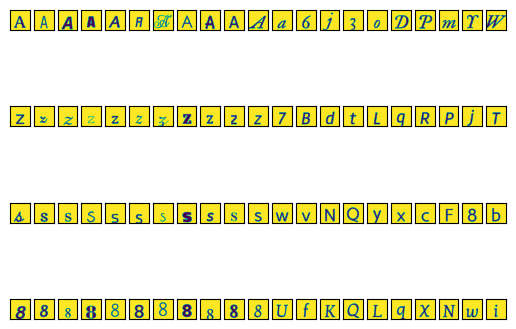

In [2]:
import matplotlib.pyplot as plt
from itertools import product

import torch

for (content_b, style_b), target_b in train_loader:

    # print(content_b.size())
    # print(style_b.size())
    # print(target_b.size())

    _, sps = plt.subplots(BATCH_SIZE, NSAMPLES * 2 + 1)

    # print(torch.sum((target_b[0] == 0) + (target_b[0] == 255)))

    for i, j in product(range(BATCH_SIZE), range(NSAMPLES * 2 + 1)):
        sps[i, j].set_xticks([])
        sps[i, j].set_yticks([])
    for i in range(BATCH_SIZE):

        for j in range(NSAMPLES):
            sps[i, j].imshow(content_b[i][j].permute(1, 2, 0))
        sps[i, NSAMPLES].imshow(target_b[i].permute(1, 2, 0))

        for j in range(NSAMPLES):
            sps[i, j + NSAMPLES + 1].imshow(style_b[i][j].permute(1, 2, 0))

    break

# print(batches)


In [3]:
from model import SeparatingStyleAndContent

model = SeparatingStyleAndContent(10)

for (content_b, style_b), target_b in train_loader:
    model(content_b, style_b)
    break